In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency as chi2
from scipy.stats import pearsonr, f_oneway, ttest_ind

In [2]:
df = pd.read_excel('titanic.xlsx')

In [3]:
# siistitään syötteitä helpommin luettavaksi
df['survived'] = df['survived'].replace({0:'No', 1:'Yes'})
df['pclass'] = df['pclass'].replace({1:'1st', 2:'2nd', 3:'3rd'})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,No,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,No,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3rd,No,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3rd,No,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3rd,No,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
# ristiintaulukoidaan luokat ja selviytyminen
df2 = pd.crosstab(df['pclass'], df['survived'])
df2.index.name = 'Class'
df2.columns.name = 'Survived'
df2

Survived,No,Yes
Class,,
1st,123,200
2nd,158,119
3rd,528,181


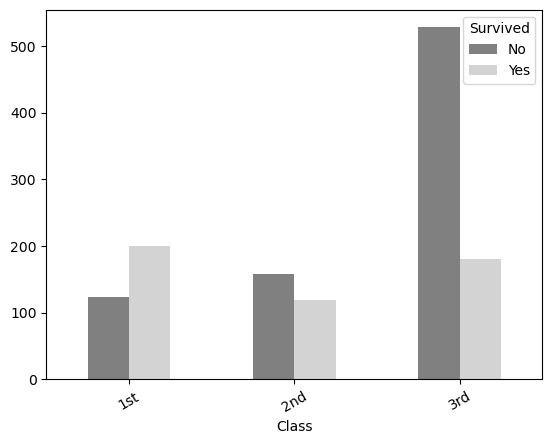

In [5]:
# valitaan värit pylväille ja tehdään pylväskartta
colors = ['gray', 'lightgray']
df2.plot.bar(color = colors)
plt.xticks(rotation=30, horizontalalignment="center")

plt.show()

In [6]:
p = chi2(df2)[1]
p = np.format_float_positional(p)
print(f'Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.00000000000000000000000000017208259588256175 < 0.05


<AxesSubplot:xlabel='survived', ylabel='fare'>

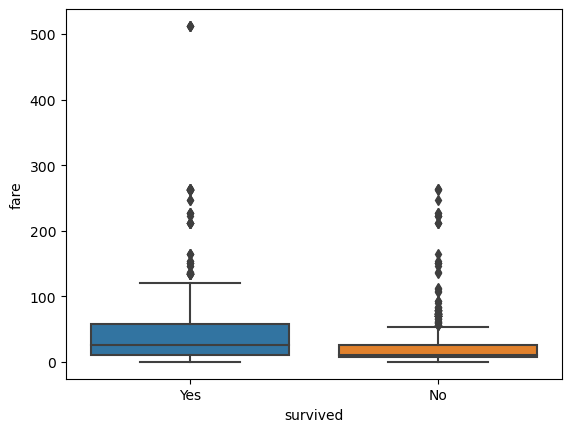

In [7]:
# katsotaan selvitymisen jakautuminen lipun hinnan perusteella
sns.boxplot(data=df, x='survived', y='fare')

In [8]:
# tehdään T-testi
f1 = df['fare'][df['survived']=='Yes']
f2 = df['fare'][df['survived']=='No']

p = ttest_ind(f1, f2, equal_var=False, nan_policy='omit')[1]

# muokataan 'scientific notation' pois
p = np.format_float_positional(p)

print(f'T-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

T-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.000000000000012841282282914805 < 0.05


In [9]:
# tehdään uusi dataframe ilman ikää, jossa voidaan tutkia jakoa tarkemmin
df4 = pd.crosstab([df['survived'], df['sex']], df['pclass'])
df4.index = df4.index.set_names('Survived', level=0)
df4.index = df4.index.set_names('Sex', level=1)
df4.columns = df4.columns.rename("Class")

df4

Class            1st  2nd  3rd
Survived Sex                  
No       female    5   12  110
         male    118  146  418
Yes      female  139   94  106
         male     61   25   75

In [10]:
p = chi2(df4)[1]
p = np.format_float_positional(p)
print(f'Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.0000000000000000000000000000000010036163141380244 < 0.05


In [11]:
# lasketaann rivien summat
df4['Total'] = df4.sum(axis=1)

# haetaan naisten, miesten ja kaikkien matkustajien määrät
f_total = df[df['sex']=='female'].shape[0]
m_total = df[df['sex']=='male'].shape[0]
a_total = f_total + m_total

# lasketaan kuinka monta prosenttia kokonaismäärästä kukin rivi on ja pyöristetään
# tuloksena %-jakauma selviytymisen ja sukupuolen mukaan
# eli n-prosenttia kaikista matkustajista
df4['%'] = (df4['Total']/a_total*100).round(2)
df4

Class            1st  2nd  3rd  Total     %
Survived Sex                               
No       female    5   12  110    127   9.7
         male    118  146  418    682  52.1
Yes      female  139   94  106    339  25.9
         male     61   25   75    161  12.3

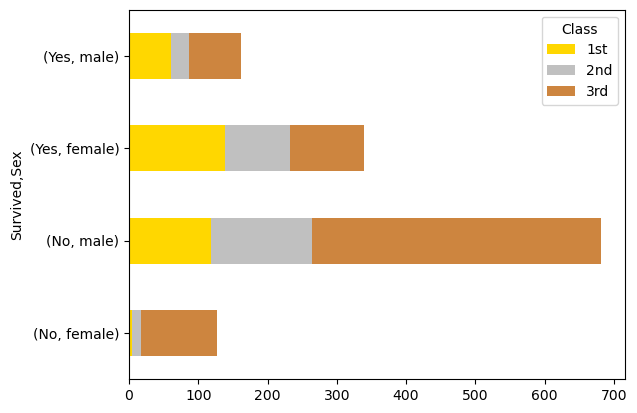

In [12]:
# tehdään vaakapylväskaavio selviytymisestä luokan ja sukupuolen perusteella
dbar4 = df4.drop(['Total','%'], axis=1)
colors2 = ['gold', 'silver', 'peru']

dbar4.plot.barh(color=colors2, stacked=True)
plt.show()

In [13]:
# selviytymisen ero prosentuaalisesti sukupuolen perusteella
s1 = pd.crosstab(df['survived'], df['sex']).T
s2 = pd.crosstab(df['survived'], df['sex'], normalize='columns')*100

for sarake in s1.columns: 
    s2 = s2.rename(columns={sarake:f'{sarake}, n = {s1[sarake].sum()}'})

s2.style.format('{:.1f} %').background_gradient(cmap='Reds')

sex,female,male
survived,,
No,27.3 %,80.9 %
Yes,72.7 %,19.1 %


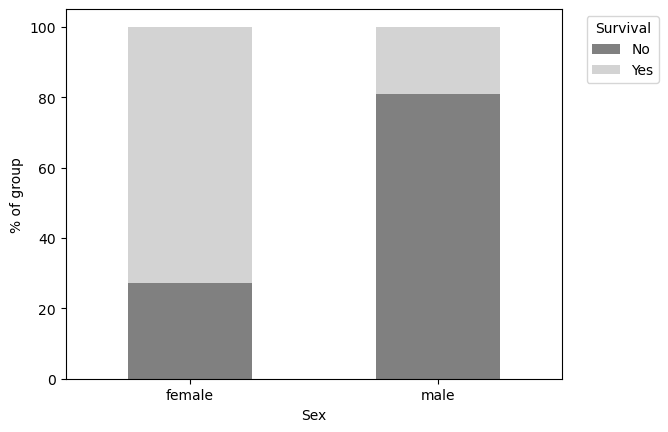

In [14]:
# tehdään pylväskaavio
s2.T.plot.bar(stacked=True, color=colors)
plt.ylabel('% of group')
plt.xlabel('Sex')
plt.legend(loc=(1.05, 0.8), title='Survival')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [15]:
p = chi2(s1)[1]
p = np.format_float_positional(p)

print(f'Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

Khiin neliö-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.000000000000000000000000000000000000000000000000000000000000000000000000000000004589924936952945 < 0.05


In [16]:
# määritellään ikäluokat
bins = [0,10,20,30,40,50,60,70,80]
df['ikäluokka'] = pd.cut(df['age'], bins=bins)

# tehdään dataframe: selviytyneet ja menehtyneet lajiteltuna sukupuolen, luokan ja iän mukaan.
df3 = pd.crosstab([df['survived'], df['sex'], df['pclass']] , df['ikäluokka'])

# siistitään indeksiä
df3.index = df3.index.set_names('Survived', level=0)
df3.index = df3.index.set_names('Sex', level=1)
df3.index = df3.index.set_names('Class', level=2)
df3.columns = df3.columns.rename("Age")
df3

Age                    (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  \
Survived Sex    Class                                                    
No       female 1st          1         0         1         1         1   
                2nd          0         1         6         1         1   
                3rd         15        17        28        12         8   
         male   1st          0         4        18        18        29   
                2nd          0        15        56        32        17   
                3rd         20        61       118        57        24   
Yes      female 1st          0        15        32        33        22   
                2nd         11        15        34        19        11   
                3rd         14        20        25         9         3   
         male   1st          3         3        12        14        13   
                2nd         11         2         5         3         1   
                3rd         11         9        26        11         2   

Age                    (50, 60]  (60, 70]  (70, 80]  
Survived Sex    Class                                
No       female 1st           0         1         0  
                2nd           2         0         0  
                3rd           0         0         0  
         male   1st          15        12         2  
                2nd          10         5         0  
                3rd           5         3         2  
Yes      female 1st          21         4         1  
                2nd           2         0         0  
                3rd           0         1         0  
         male   1st           7         0         1  
                2nd           0         1         0  
                3rd           0         0         0

In [17]:
# ikäluokkien keskiarvot ja lukumäärät
dfP = df.pivot_table(values='age', index='ikäluokka', aggfunc=['mean', len])
dfP.columns = ['Keskiarvo', 'Lkm']
dfP.style.format(precision=0).background_gradient(cmap='Greens', axis=0)

,Keskiarvo,Lkm
ikäluokka,,
"(0, 10]",4,86
"(10, 20]",17,162
"(20, 30]",25,361
"(30, 40]",35,210
"(40, 50]",45,132
"(50, 60]",55,62
"(60, 70]",64,27
"(70, 80]",74,6


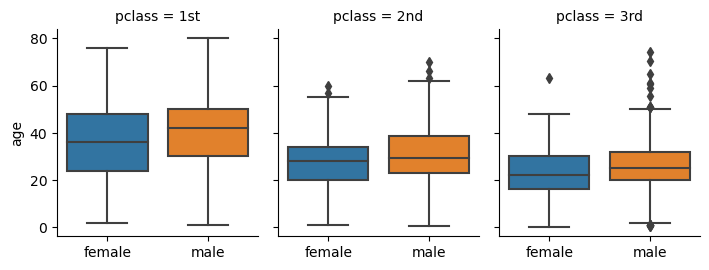

In [18]:
# ikäjakauma luokan ja sukupuolen mukaan
g = sns.catplot(data=df, x='sex', y='age', col='pclass', kind='box', height=3, aspect=0.8)
g.set_xlabels('')
plt.show()

In [19]:
# tehdään F-testi
# poistetaan ensin tyhjät arvot ja luodaan sitten ryhmät
df_dropna = df.dropna(subset=['age'])
k1 = df_dropna['age'][df_dropna['pclass']=='1st']
k2 = df_dropna['age'][df_dropna['pclass']=='2nd']
k3 = df_dropna['age'][df_dropna['pclass']=='3rd']

p = f_oneway(k1, k2, k3)[1]

# muokataan 'scientific notation' pois
p = np.format_float_positional(p)

print(f'F-testin tulos: Riippuvuus on merkittävä, p-arvo on {p} < 0.05')

F-testin tulos: Riippuvuus on merkittävä, p-arvo on 0.00000000000000000000000000000000000000000017972028849109706 < 0.05


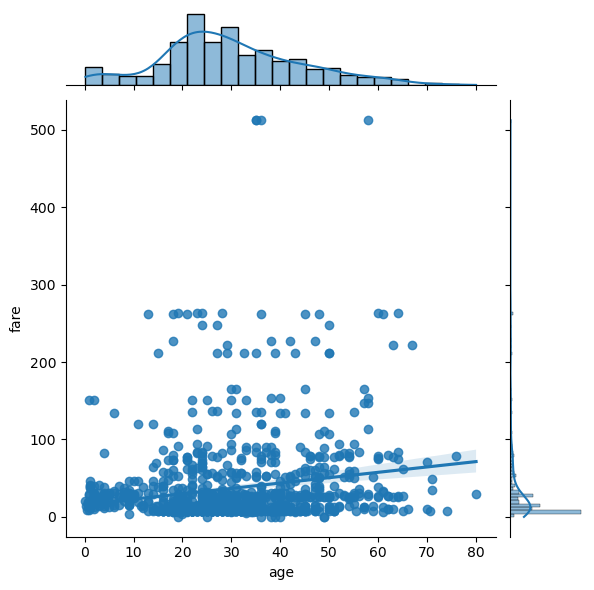

In [20]:
# iän ja matkalipun hinnan tarkastelu hajontakaaviona
sns.jointplot(data=df, x='age', y='fare', kind='reg')

In [21]:
# katsotaan määrällisten muuttujien korrelaatio
ax = df.corr()
ax

,age,sibsp,parch,fare,body
age,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,0.178739,0.160238,0.221539,1.000000,-0.043110
body,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [22]:
# tarkistetaan korrelaatiokertoimien tilastollinen merkittävyys 
# korrelaatio iän kanssa
for muuttuja in ax:
    df_dropna = df.dropna(subset=[muuttuja, 'age'])
    r, p = pearsonr(df_dropna['age'], df_dropna[muuttuja])
    p = np.format_float_positional(p)
    print(f'{muuttuja:<25} r = {r:>6.3f}, p = {p}')

age                       r =  1.000, p = 0.
sibsp                     r = -0.244, p = 0.0000000000000013159174905650715
parch                     r = -0.151, p = 0.0000009427200768785341
fare                      r =  0.179, p = 0.000000005955355439005716
body                      r =  0.059, p = 0.523456138557946
